<a href="https://colab.research.google.com/github/MugoChege/Liver-and-Tweets/blob/main/Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import seaborn as seb
import matplotlib.pyplot as plt

#PROBLEM STATEMENT

##Specifying the question

using Naives Bay's models; can we detect which email is spam vs which email is not spam.

##Determining the metric of success

The project shall be deemed successful when the model predicts spam emails at a higher than 85% success rate.

##Recommending the experimental design

The project will be done in the following way:


1.   Scanning of the data to get an overview
2.   Data acquisition, exploration, transfromation and loading.
3.   Exploratory data analysis will thus be used to find out more on how to approach the modelling
4. Modelling using Naive's Bay shall be done using the data and tested



##Context of the data

Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
Generated: June-July 1999

##Data relevance

The data originated nearly 20 years ago so it is quite relevant.

#DATA ACQUISITION, EXPLORATION, TRANDFORMATION AND LOADING

In [167]:
names = open('/content/spambase.names' , 'r')
data = open('/content/spambase.data' , 'r')
doc = open('/content/spambase.DOCUMENTATION' , 'r')

###Reading the files

The files are opened and the raw data is looked at.

In [168]:
#spambase.names file is openned

print(names.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [169]:
#spambase.data file is openned

print(data.read())

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1
0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137,0,0.137,0,0,3.537,40,191,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.135,0,0.135,0,0,3.537,40,191,1
0,0,0,0,1.85,0,0,1.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [170]:
#spambase.DOCUMENTATION file is openned

print(doc.read())

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

The data in the three documents is as follows:


*   spambase.names is a file that contains the description of what the data contains which is the percentage of the apperance of a word in an email or the actual frequency of their appearance. Potential attributes are listed in the dosument.
*   spambase.data is a file (csv) that should follow the spambase.name file with information on the counts of the data described above.
*   spambase.DOCUMENTATION contains information about the data; its origin and its desciption which shall be used to verify its validity.



###Getting the usable data

In [171]:
#Extracts the metrics from the spambase.name document

with open('/content/spambase.names' , 'r') as b:
  w = b.readlines()

forwords = []

for r in w:

  if 'word_freq_'  in r and r[0] != '|':
    forwords.append((r.split(':')[0]).replace('word_freq_' , ''))
  elif 'char_freq_' in r and r[0] != '|':
    forwords.append(r.split(':')[0].replace('char_freq_' , ''))
  elif 'capital_run_length_' in r and r[0] != '|':
    forwords.append(r.split(':')[0].replace('capital_run_length_' , ''))

In [172]:
forwords

['make',
 'address',
 'all',
 '3d',
 'our',
 'over',
 'remove',
 'internet',
 'order',
 'mail',
 'receive',
 'will',
 'people',
 'report',
 'addresses',
 'free',
 'business',
 'email',
 'you',
 'credit',
 'your',
 'font',
 '000',
 'money',
 'hp',
 'hpl',
 'george',
 '650',
 'lab',
 'labs',
 'telnet',
 '857',
 'data',
 '415',
 '85',
 'technology',
 '1999',
 'parts',
 'pm',
 'direct',
 'cs',
 'meeting',
 'original',
 'project',
 're',
 'edu',
 'table',
 'conference',
 ';',
 '(',
 '[',
 '!',
 '$',
 '#',
 'average',
 'longest',
 'total']

In [173]:
forwords.append('SPAM')

In [174]:
#makes a dictionary which is later converted to a dataframe from the description
#in the spambase.DOCUMENTATION document

with open('/content/spambase.DOCUMENTATION', 'r') as l:
  d = l.readlines()

fresh = {}
strin = ''
g = 0
co = 0
we = 1

for t in d:
  if 'Attribute Statistics:' in t:
    g = 1
    continue
  if g == 1 and co < 58:
    if we == 1:
      we = 0
      continue
    else:
      co += 1
      op = t.replace(' ', ':')
      op = op.replace('::', ':')
      op = op.replace('::', ':')
      op = op.replace('::', ':')
      op = op.replace('::', ':')
      op = op.replace('::', ':')
      op = op.replace(':', ',')
      h = ','
      m = op.split(h)
      fresh[m[0]] = [m[1] , m[2] , m[3] , m[4], m[5]]

In [175]:
mat = pd.DataFrame.from_dict(fresh).transpose()
mat.columns=[ 'Min', 'Max', 'Average', 'Std.Dev', 'Coeff.Var']
mat.reset_index(inplace=True)
mat.drop(columns='index', inplace=True)
mat

,Min,Max,Average,Std.Dev,Coeff.Var
0,0,4.54,0.10455,0.30536,292
1,0,14.28,0.21301,1.2906,606
2,0,5.1,0.28066,0.50414,180
3,0,42.81,0.065425,1.3952,2130
4,0,10,0.31222,0.67251,215
5,0,5.88,0.095901,0.27382,286
6,0,7.27,0.11421,0.39144,343
7,0,11.11,0.10529,0.40107,381
8,0,5.26,0.090067,0.27862,309
9,0,18.18,0.23941,0.64476,269


###Loading the data

In [176]:
da = pd.read_csv('/content/spambase.data', header=None, index_col=None)
da.columns = forwords

In [177]:
da.shape

(4601, 58)

In [178]:
da.head(10)

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,;,(,[,!,$,#,average,longest,total,SPAM
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [179]:
desc=pd.DataFrame(da.describe()).transpose()
desc.reset_index(inplace=True)
desc

,index,count,mean,std,min,25%,50%,75%,max
0,make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
1,address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
2,all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
3,3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
4,our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
5,over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
6,remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
7,internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
8,order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
9,mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


##Checking on the appropriateness of the data

Using data from the calculated values of the spam.data dataset and the summaried that are in the spambase.DOCUMENTATION document; the values are checked to see if their difference is 0 which should signify some similarity.

In [180]:
comp = pd.merge(desc, mat, left_index=True, right_index=True)

In [181]:
comp['Delta Mean'] = comp['mean'] - pd.to_numeric(comp['Average'])
comp['Delta Minimum'] = comp['min'] - pd.to_numeric(comp['Min'])
comp['Delta Maximum'] = comp['max'] - pd.to_numeric(comp['Max'])

In [182]:
comp.describe()

,count,mean,std,min,25%,50%,75%,max,Delta Mean,Delta Minimum,Delta Maximum
count,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.0,58.0
mean,4601.0,6.051516,14.940458,0.051724,0.734276,1.965017,5.519672,475.615483,-1.491097e-05,0.0,0.0
std,0.0,37.669723,83.112274,0.223404,4.649562,12.588636,35.259039,2438.090548,9.766377e-05,0.0,0.0
min,4601.0,0.005444,0.076274,0.000000,0.000000,0.000000,0.000000,1.000000,-7.150619e-04,0.0,0.0
25%,4601.0,0.064982,0.328780,0.000000,0.000000,0.000000,0.000000,5.632500,-3.576396e-07,0.0,0.0
50%,4601.0,0.103702,0.450368,0.000000,0.000000,0.000000,0.000000,10.000000,2.311454e-07,0.0,0.0
75%,4601.0,0.246489,0.823262,0.000000,0.000000,0.000000,0.039000,18.180000,2.605412e-06,0.0,0.0
max,4601.0,283.289285,606.347851,1.000000,35.000000,95.000000,266.000000,15841.000000,1.510541e-05,0.0,0.0


From the data above we can see the values of the added rows are either 0 of negligible due to rounding off errors.

##Cleaning

###Checking for missing values

In [183]:
da.isnull().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
000           0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
;             0
(             0
[             0
!             0
$             0
#             0
average       0
longest       0
total         0
SPAM          0
dtype: int64

###Duplicated data handling

In [184]:
da.duplicated().sum()

391

In [185]:
da.drop_duplicates(inplace=True)

###Anomalies

In [186]:
da.dtypes

make          float64
address       float64
all           float64
3d            float64
our           float64
over          float64
remove        float64
internet      float64
order         float64
mail          float64
receive       float64
will          float64
people        float64
report        float64
addresses     float64
free          float64
business      float64
email         float64
you           float64
credit        float64
your          float64
font          float64
000           float64
money         float64
hp            float64
hpl           float64
george        float64
650           float64
lab           float64
labs          float64
telnet        float64
857           float64
data          float64
415           float64
85            float64
technology    float64
1999          float64
parts         float64
pm            float64
direct        float64
cs            float64
meeting       float64
original      float64
project       float64
re            float64
edu       

###Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

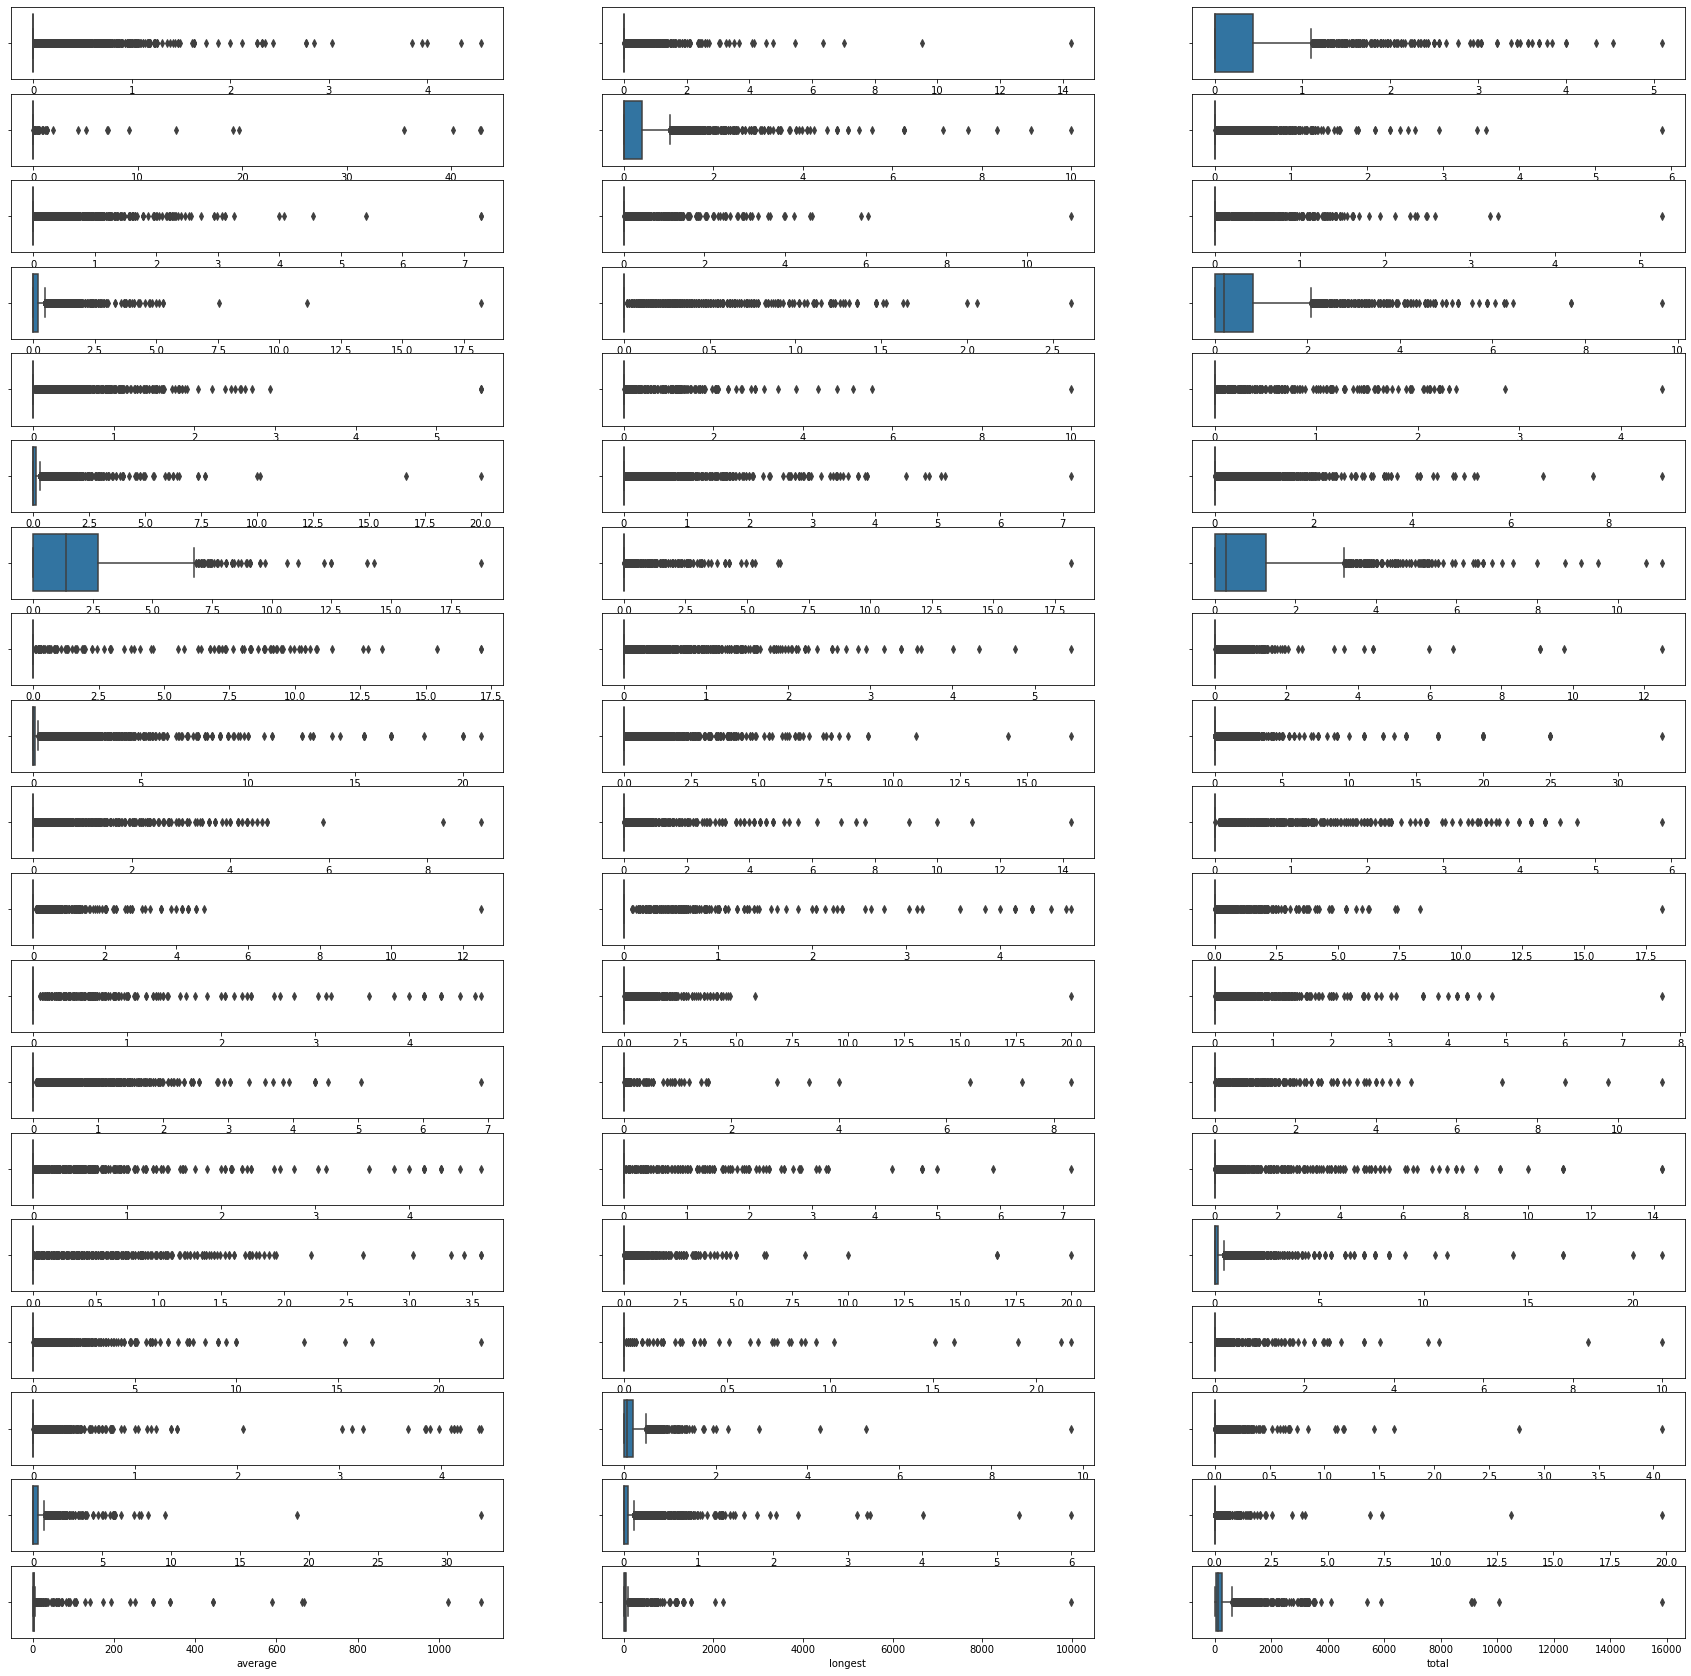

In [187]:
f , a = plt.subplots(nrows= 19 , ncols= 3 , figsize=(30,30))
toplot = da.columns
toplot = toplot[:-1]
num = 1

for e in toplot:
  plt.subplot(19 , 3 , num)
  seb.boxplot(da[e])
  num += 1

plt.show()

Considering that the dataset contains data about the percentage of words from the email which is taken to be english with the rotter of words that are tallied here. The outliers are not used due to the “you know that that that that from the previous sentence was different from the one in this sentence.”
thereby though correct there is 1 word appearing too many times taking the highest percentage.

#EXPLORATORY DATA ANALYSIS

This shall be approched in the correlatory sense. Here we are looking for words that may potentially occur in phrases.

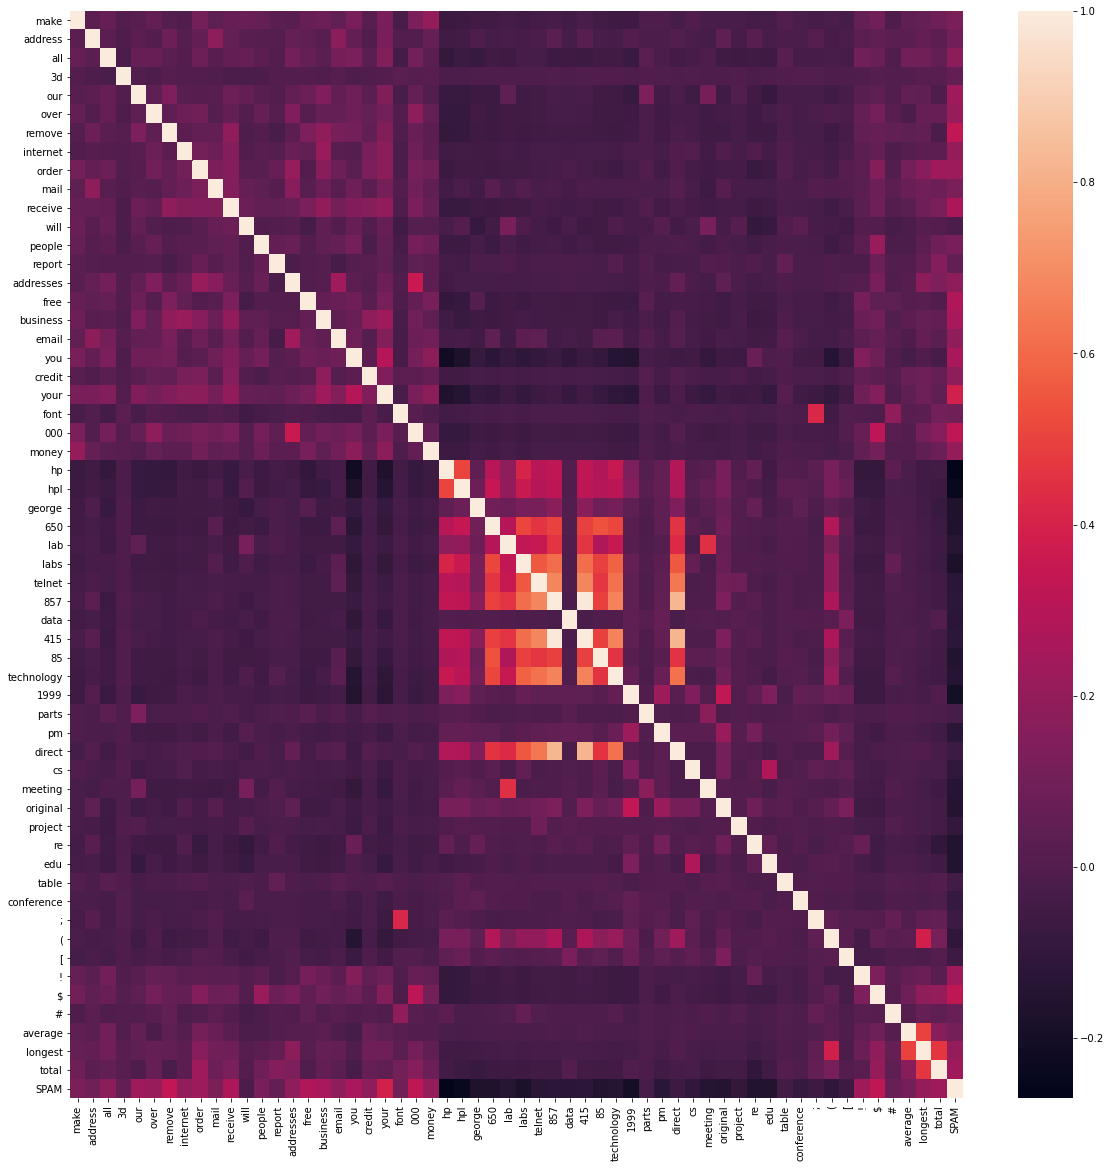

In [188]:
plt.figure(figsize=(20,20))

seb.heatmap(da.corr())

In [189]:
#filtering out the correlations above 0.5

dacor = da.corr()
dacor = dacor[dacor > .5]
dacor.drop([col for col, val in dacor.sum().iteritems() if val ==1] , axis= 1,inplace=True)
dacor.dropna(how='all' , axis = 0)

,hp,hpl,650,labs,telnet,857,415,85,technology,direct
hp,1.000000,0.504655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hpl,0.504655,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,1.000000,0.513077,NaN,0.500121,NaN,0.542526,0.513107,NaN
labs,NaN,NaN,0.513077,1.000000,0.557627,0.611890,0.609025,NaN,0.579540,0.555914
telnet,NaN,NaN,NaN,0.557627,1.000000,0.681542,0.678672,NaN,0.621127,0.641129
857,NaN,NaN,0.500121,0.611890,0.681542,1.000000,0.994875,NaN,0.672118,0.824206
415,NaN,NaN,NaN,0.609025,0.678672,0.994875,1.000000,NaN,0.668905,0.820837
85,NaN,NaN,0.542526,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
technology,NaN,NaN,0.513107,0.579540,0.621127,0.672118,0.668905,NaN,1.000000,0.620903
direct,NaN,NaN,NaN,0.555914,0.641129,0.824206,0.820837,NaN,0.620903,1.000000


Above is the correlation of words in the emails.

#IMPLEMENTING THE SOLUTION

Libraries are loaded and the data is prepaired for processing

In [190]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
tts = train_test_split

from sklearn.preprocessing import PowerTransformer

from sklearn.naive_bayes import GaussianNB

In [191]:
xm= da.drop(columns=['SPAM'])
ym= da['SPAM']

In [192]:
normalizer = Normalizer()
normalizer.transform(x)

array([[-0.10135644,  0.43213177,  0.25449021, ...,  0.14269418,
         0.18318081,  0.12958452],
       [ 0.18397441,  0.21675526,  0.11839234, ...,  0.11740972,
         0.13145595,  0.15896417],
       [ 0.07081338, -0.04656947,  0.13725932, ...,  0.17137838,
         0.21168141,  0.20265236],
       ...,
       [ 0.30162439, -0.07250386,  0.11251139, ..., -0.15784613,
        -0.11842111,  0.01449357],
       [ 0.34715128, -0.07761097, -0.13000618, ..., -0.24012694,
        -0.15045251, -0.03100271],
       [-0.09236895, -0.08262136,  0.23371136, ..., -0.22316085,
        -0.1601654 , -0.11322021]])

In [193]:
corr_matrix = xm.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
td = [column for column in upper.columns if any(upper[column] > 0.95)]

In [194]:
xm = xm.drop(columns= td)
xm

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,;,(,[,!,$,#,average,longest,total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


##Multinomial Naive's Bay

In [195]:
x = xm
y = ym.values

In [196]:
xtr , xte = tts(x , test_size = 0.2 , random_state=0)
ytr , yte = tts(y , test_size = 0.2 , random_state=0)

In [197]:
parameters = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

In [198]:
grid_search = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=parameters,
                           cv=5)

grid_search.fit(xtr, ytr)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
grid_search.best_params_

par = grid_search.best_params_

alpha = par['alpha'] 
fit_prior = par['fit_prior']

In [200]:
model = MultinomialNB(alpha=alpha, fit_prior=fit_prior).fit(xtr , ytr)

In [201]:
pred = model.predict(xte)

In [202]:
print(f'Accuracy score of {accuracy_score(yte, pred)}')

Accuracy score of 0.7719714964370546


In [203]:
confusion_matrix = confusion_matrix(yte, pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[411,  84],
       [108, 239]])

In [204]:
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       495
           1       0.74      0.69      0.71       347

    accuracy                           0.77       842
   macro avg       0.77      0.76      0.76       842
weighted avg       0.77      0.77      0.77       842



##Gaussian Naive's Bay

In [205]:
x = xm
y = ym.values

In [206]:
xtr , xte = tts(x , test_size = 0.2 , random_state=0)
ytr , yte = tts(y , test_size = 0.2 , random_state=0)

In [207]:
x = PowerTransformer().fit_transform(x)

In [208]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=parameters, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

grid_search.fit(xtr, ytr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [209]:
grid_search.best_params_

{'var_smoothing': 8.111308307896872e-07}

In [210]:
par = grid_search.best_params_

var_smoothing = par['var_smoothing']

In [211]:
clf = GaussianNB(var_smoothing=var_smoothing)  
model = clf.fit(xtr, ytr)

In [212]:
pred = model.predict(xte)

In [213]:
print(f'Accuracy score of {accuracy_score(yte, pred)}')

Accuracy score of 0.8954869358669834


In [214]:
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       495
           1       0.85      0.91      0.88       347

    accuracy                           0.90       842
   macro avg       0.89      0.90      0.89       842
weighted avg       0.90      0.90      0.90       842



#CONCLUSION

The Gaussian Naive's Bay method worked better at predicting giving an acuracy score of nearly 90%